# Project 1: Credit Card Fraud Detection
The total score for this project is 25. It will contribute 20 out of 100 in our final score. I will determine the deadline for this project later depending on our progress.

In [ ]:
from google.colab import files
upload = files.upload()

Saving creditcard.csv to creditcard.csv


In [ ]:
#####################################################
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score ,accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import KFold
#####################################################

In [ ]:
#Importing data
df1 = pd.read_csv("creditcard.csv")
df1.head()
### ToDO:
## Remove the Time feature
## 2 points
df= df1.drop('Time', axis = 1)

In [ ]:
#### Exploratory Data Analysis
### ToDO:
## 2 points
cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class ==  1])
fraud_percentage = round(fraud_count/cases*100, 2)

from termcolor import colored as cl # text customization
print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(nonfraud_count), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(fraud_count), attrs = ['bold']))
print(cl('Percentage of fraud cases is {}'.format(fraud_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 284807
Number of Non-fraud cases are 284315
Number of Non-fraud cases are 492
Percentage of fraud cases is 0.17
--------------------------------------------


In [ ]:
###################################################
## Training and Testing Data Split
X = df.drop('Class', axis = 1).values
y = df['Class'].values

### ToDO:
## 2 points
## Use test_size as 0.2
X_train, X_test, y_train, y_test = train_test_split(X , y  , test_size = 0.2 , random_state = 0)

In [ ]:
## Model Fitting Process
# Fit a  Logistic Regression as baseline
# once fit the model, make predictions using
# testing dataset X_test
### ToDO:
## 3 points
lr = LogisticRegression()
lr.fit( X_train, y_train )
lr_ypred = lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
lr.score(X_test,y_test)

0.9991573329588147

In [ ]:
## Model Fitting Process
# Fit a Decision Tree Model
# once fit the model, make predictions using
# testing dataset X_test
### ToDO:
## 3 points
## use criterion="gini"
tree_model = DecisionTreeClassifier()
tree_model.fit( X_train, y_train)
tree_ypred = tree_model.predict(X_test)

In [ ]:
## Fit a Random Forest and make predictions using X_test
### ToDO:
## 3 points
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_ypred = rf.predict(X_test)

In [ ]:
### Model Evaluation Process
### Using Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, tree_ypred))
## To learn about ROC and AUC, you can read
## the tutorial here:
## https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

### Using Confusion Matrix
# helper function
## add true and predicted in the x and y axis
def plot_confusionmatrix(y_train_pred,y_train,dom, classes):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train,y_train_pred)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.75      0.75      0.75       101

    accuracy                           1.00     56962
   macro avg       0.88      0.88      0.88     56962
weighted avg       1.00      1.00      1.00     56962



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.88      0.60      0.72       101

    accuracy                           1.00     56962
   macro avg       0.94      0.80      0.86     56962
weighted avg       1.00      1.00      1.00     56962

Test Confusion matrix


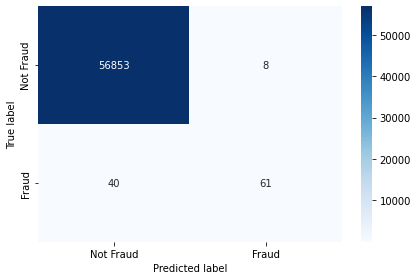

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


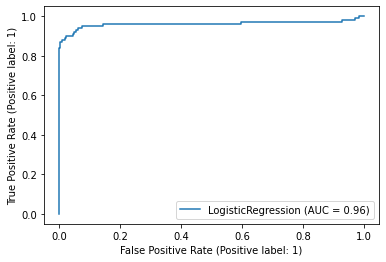

In [ ]:
## Evaluate baseline Logistic Regression Model
classes =['Not Fraud', 'Fraud']
print(classification_report(y_test, lr_ypred))
plot_confusionmatrix(lr_ypred,y_test,dom='Test', classes=classes)
plot_roc_curve(lr, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.75      0.75      0.75       101

    accuracy                           1.00     56962
   macro avg       0.88      0.88      0.88     56962
weighted avg       1.00      1.00      1.00     56962

Test Confusion matrix


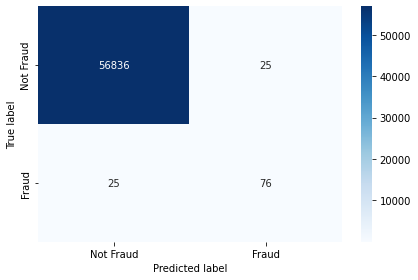

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


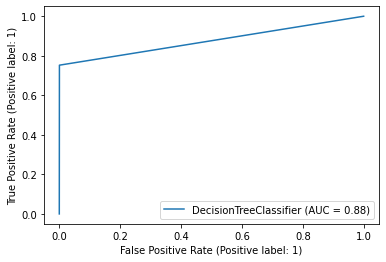

In [ ]:
### ToDO:
## 3 points
## Evaluate Decision Tree Model for classification
## using classification_report()
## using plot_confusionmatrix
## Using plot_roc_curve
print(classification_report(y_test, tree_ypred))
plot_confusionmatrix(tree_ypred,y_test,dom='Test', classes=classes)
plot_roc_curve(tree_model, X_test, y_test)




              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.92      0.79      0.85       101

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Test Confusion matrix


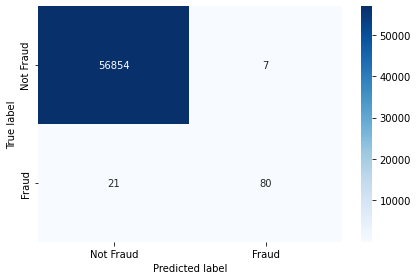

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


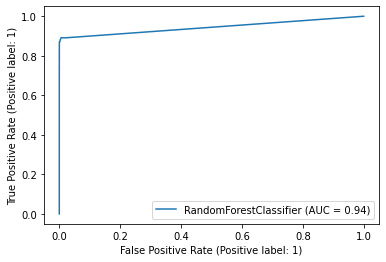

In [ ]:
### ToDO:
## 3 points
## Evaluate Random Forest Model for classification
## using classification_report()
## using plot_confusionmatrix
## Using plot_roc_curve
print(classification_report(y_test, rf_ypred))
plot_confusionmatrix(rf_ypred,y_test,dom='Test', classes=classes)
plot_roc_curve(rf, X_test, y_test)




In [ ]:
### Fine-Tune Random Forest
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

class_weight=dict({0:1,1:100})

np.random.seed(42)

## ToDO:
## 4 points
# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(class_weight= class_weight),
                           param_distributions=rf_grid ,
                           cv=2,
                           n_iter=2,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)
# Make predictions with tuned model
rs_rf_ypred = rs_rf.predict(X_test)


Fitting 2 folds for each of 2 candidates, totalling 4 fits


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


The number of classes before fit Counter({0: 227454, 1: 391})
The number of classes after fit Counter({0: 227450, 1: 170586})
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.85      0.85      0.85       101

    accuracy                           1.00     56962
   macro avg       0.93      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Test Confusion matrix


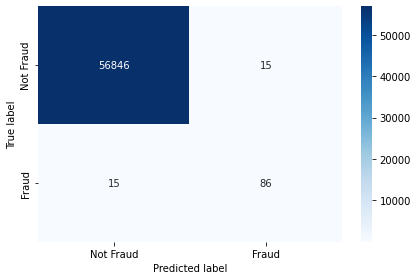

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


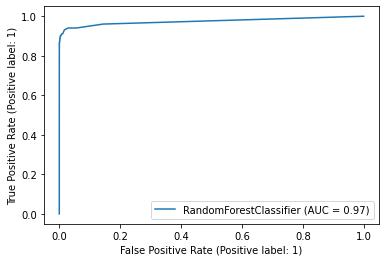

In [ ]:
## Fit a Random Forest with SMOTE method to deal with
## imbalanced dataset
## SMOTE technique with random forest
from imblearn.combine import SMOTETomek
from collections import Counter
os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

rfs_ypred=classifier.predict(X_test)
print(classification_report(y_test, rfs_ypred))
plot_confusionmatrix(rfs_ypred,y_test,dom='Test', classes=classes)
plot_roc_curve(classifier, X_test, y_test)